<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# PyPI - Get release Dates from PyPI
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/PyPI/PyPI_Get_number_of_downloads_any_package.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/Open_in_Naas_Lab.svg"/></a><br><br><a href="https://bit.ly/3JyWIk6">Give Feedbacks</a> | <a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Naas/Naas_Start_data_product.ipynb" target="_parent">Generate Data Product</a>

**Tags:** #pypi #downloads #package #operations #analytics #plotly #html #csv #image #png

**Author:** [Mardiat-Iman](https://www.linkedin.com/in/mardiat-iman-ibrahim-imam-726027262)

**Created:** 2023-07-27

**Description:** This notebook provides a way to retrieve the release dates any package from the Python Package Index (PyPI).

## Input

### Import Libraries

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.parser import parse


### Variables

In [2]:
# Allow the user to input the package name
user_input = input("Enter the package name to fetch release dates from PyPI: ")
# Extract the package name (remove version number if present)
package_name = user_input.split()[0]


Enter the package name to fetch release dates from PyPI:  naas 2.11.4


## Model

In [3]:
def get_release_dates(package_name):
    url = f"https://pypi.org/pypi/{package_name}/json"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        releases = data.get("releases", {})
        if not releases:
            print(f"No releases found for package '{package_name}'.")
        else:
            for version, release_info in releases.items():
                if release_info and isinstance(release_info, list):
                    latest_release = max(release_info, key=lambda x: x["upload_time"])
                    release_date = latest_release["upload_time"]
                    print(f"Version: {version}, Release Date: {release_date}")
    else:
        print(f"Error: Package '{package_name}' not found or error in fetching data.")
        print("Raw JSON Response:", response.text)


# Extract the package name (remove version number if present)
package_name = user_input.split()[0]


# Call the function with the package name to get the release dates
release_dates = get_release_dates(package_name)


Version: 0.0.1, Release Date: 2020-09-19T02:24:39
Version: 0.0.10, Release Date: 2020-09-21T23:47:55
Version: 0.0.11, Release Date: 2020-09-21T23:59:02
Version: 0.0.12, Release Date: 2020-09-22T00:51:44
Version: 0.0.13, Release Date: 2020-09-22T00:55:06
Version: 0.0.14, Release Date: 2020-09-22T01:36:09
Version: 0.0.15, Release Date: 2020-09-22T02:16:20
Version: 0.0.16, Release Date: 2020-09-22T10:18:24
Version: 0.0.17, Release Date: 2020-09-22T23:30:30
Version: 0.0.2, Release Date: 2020-09-19T02:33:50
Version: 0.0.21, Release Date: 2020-09-22T23:31:07
Version: 0.0.22, Release Date: 2020-09-23T00:06:05
Version: 0.0.24, Release Date: 2020-09-23T12:43:40
Version: 0.0.3, Release Date: 2020-09-19T11:33:27
Version: 0.0.4, Release Date: 2020-09-20T15:11:21
Version: 0.0.5, Release Date: 2020-09-20T15:23:14
Version: 0.0.6, Release Date: 2020-09-20T15:26:08
Version: 0.0.7, Release Date: 2020-09-20T15:29:41
Version: 0.0.8, Release Date: 2020-09-20T15:35:19
Version: 0.0.9, Release Date: 2020-09-2

## Output

### Plotting a Barchart and Scatter Plot for the release dates

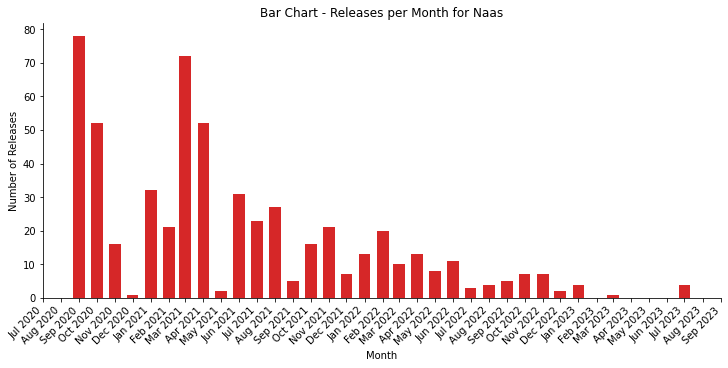

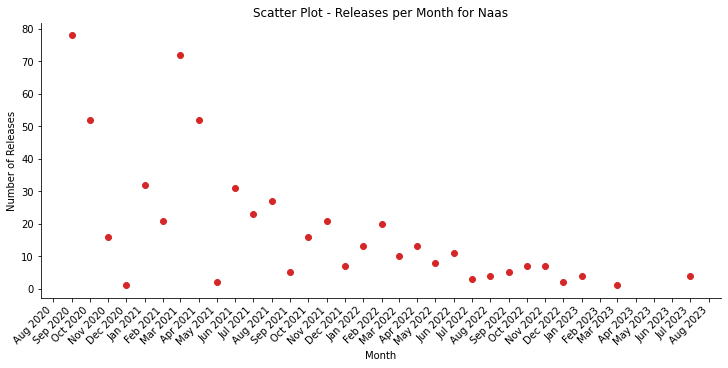

In [5]:
def get_release_dates(package_name):
    url = f"https://pypi.org/pypi/{package_name}/json"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        releases = data.get("releases", {})
        release_dates = [parse(release_info[0]["upload_time"]) for release_info in releases.values() if release_info]
        return release_dates
    else:
        print(f"Error: Package '{package_name}' not found or error in fetching data.")
        return []

# Specify the package name
package_name = "naas"

# Call the function with the package name to get the release dates
release_dates = get_release_dates(package_name)

# Check if release dates were obtained successfully
if release_dates:
    # Sort release dates in ascending order
    release_dates.sort()

    
# 2. Bar Chart - Releases per Month
    release_months = [date.strftime('%Y-%m') for date in release_dates]
    unique_months, month_counts = np.unique(release_months, return_counts=True)
    unique_months = [parse(month + '-01') for month in unique_months]  # Convert back to datetime objects
    fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
    ax.set(title=f"Bar Chart - Releases per Month for {package_name.capitalize()}")
    ax.bar(unique_months, month_counts, color="tab:red", width=20)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Releases")
    plt.xticks(rotation=45, ha="right")
    ax.spines[["top", "right"]].set_visible(False)
    plt.savefig("bar_chart.png")  # Save the figure
    plt.show()

    # 3. Scatter Plot - Releases per Month
    fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
    ax.set(title=f"Scatter Plot - Releases per Month for {package_name.capitalize()}")
    ax.scatter(unique_months, month_counts, color="tab:red", marker="o")
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Releases")
    plt.xticks(rotation=45, ha="right")
    ax.spines[["top", "right"]].set_visible(False)
    plt.savefig("scatter_plot.png")  # Save the figure
    plt.show()

else:
    print("No release dates found for the specified package.")

### Save the figures

In [ ]:
plt.savefig("bar_chart.png")
plt.savefig("scatter_plot.png")